## **Configurações iniciais**

In [130]:
# Importa as bibliotecas que serão utilizadas na análise.

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [131]:
# Lê o .csv que contém os reviews e os salva em um DataFrame.
data = pd.read_csv("beer_reviews.csv")

In [132]:
# Exibe o DataFrame gerado na célula anterior.
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


# **Filtragem dos dados**

## Processo

### Metodologia

Como o dataset *"beer_reviews.csv"* não contém uma coluna específica para nacionalidade, foi necessário realizar uma filtragem dos dados para que algumas cervejas brasileiras pudessem ser analisadas. Nesse intuito, foi consultada uma pesquisa publicada pelo Sindicerv (Sindicato Nacional da Indústria da Cerveja) para identificar os estilos de cerveja mais consumidos no Brasil. Em seguida, foram utilizados mecanismos de pesquisa para encontrar algumas cervejas nacionais que se enquadram em cada um desses estilos. Por fim, os dados de tais cervejas foram coletados e filtrados a partir do dataset "beer_reviews.csv" para possibilitar uma análise detalhada. 

*O processo completo dessa "filtragem de dados" está descrito nas células abaixo.*

### Pesquisa do site "Surra de Lúpulo" em conjunto com o Sindicato Nacional da Industria da Cerveja

Segundo a pesquisa "Retrato dos consumidores de Cerveja 2023", divulgada em dezembro de 2023 pelo site "Surra de Lúpulo", juntamente do Sindicato Nacional da Industria da Cerveja (Sindicerv), os estilos de cerveja mais consumidos pelo brasileiro são:

1. *IPA (India Pale Ale)*
2. *Weissbier*
3. *Pilsen*
4. *American Lager*
5. *APA (American Pale Ale)*

*Link da pesquisa:* https://www.sindicerv.com.br/noticias/ipa-pilsen-e-mais-pesquisa-revela-os-estilos-de-cervejas-preferidos-dos-consumidores/  

### Resumo do resultado das buscas nos mecanismos de pesquisa

###### *AKA Google + ChatGPT*

Para cada um dos estilos de cerveja mencionados, há representantes bem conhecidos no Brasil. Para os apreciadores de IPA, a Colorado Indica é uma excelente escolha. Se você gosta de Weissbier, a Eisenbahn Weizen é uma ótima opção. No que diz respeito às Pilsners, é comum que no Brasil elas sejam confundidas com American Lagers. Entre essas categorias, há diversas opções amplamente consumidas, como Brahma, Skol e Antártica. Finalmente, para quem prefere APA, a Colorado Appia é uma ótima opção.

### Obtendo dados das cervejas descobertas na pesquisa realizada na subseção anterior

#####
Com o intuito de facilitar o trabalho que será realizado nessa subseção, vamos criar um dicionário que guarda os estilos de cerveja mais consumidos pelos brasileiros, juntamente de algumas cervejas que representam tais estilos *(isto é, as cervejas que descobrimos na busca realizada na seção anterior)*.

In [133]:
# Cria um dicionário que contém os estilos de cerveja mais consumidos pelos brasileiros. Cada estilo de cerveja tem uma ou mais cervejas 
# como suas representantes, e cada uma dessas cervejas possui um DataFrame que armazena os reviews relacionados a ela ou, no caso de algumas 
# cervejas, a ela e suas variantes.

beer_dict = {
    'India Pale Ale':{
        'Colorado Indica':pd.DataFrame()
    },
    'Weissbier':{
        'Eisenbahn Weizenbier':pd.DataFrame()
    },
    'Pilsen/American Lager':{
        'Skol':pd.DataFrame(),
        'Antarctica':pd.DataFrame(),
        'Brahma':pd.DataFrame()
    },
    'American Pale Ale':{
        'Colorado Appia':pd.DataFrame()
    }
}            

#### IPA (India Pale Ale)

In [134]:
# Nesta célula serão exibidos os reviews sobre a cerveja Colorado Indica.

# Guarda os reviews sobre a cerveja em questão no dicionário "beer_dict".
beer_dict['India Pale Ale']['Colorado Indica'] = data[data['beer_name'] == 'Colorado Indica']

# Exibe tais reviews.
beer_dict['India Pale Ale']['Colorado Indica']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
459453,10729,Cervejaria Colorado,1232995086,3.5,3.5,4.0,DoubleJ,English India Pale Ale (IPA),4.0,3.5,Colorado Indica,7.0,21562
459454,10729,Cervejaria Colorado,1209655891,4.5,3.5,4.0,errantnight,English India Pale Ale (IPA),4.0,4.0,Colorado Indica,7.0,21562


#### Weissbier

In [135]:
# Nesta célula serão exibidos os reviews sobre a cerveja Eisenbahn Weizen.

# Guarda os reviews sobre a cerveja em questão no dicionário "beer_dict".
beer_dict['Weissbier']['Eisenbahn Weizenbier'] = data[data['beer_name'] == "Eisenbahn Weizenbier"]

# Exibe tais reviews.
beer_dict['Weissbier']['Eisenbahn Weizenbier']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
568556,10096,Cervejaria Sudbrack Ltda,1311044048,4.0,3.5,3.5,fmccormi,Hefeweizen,4.0,3.5,Eisenbahn Weizenbier,4.8,19606
568557,10096,Cervejaria Sudbrack Ltda,1306008941,3.5,4.0,3.5,Northsider,Hefeweizen,3.5,3.5,Eisenbahn Weizenbier,4.8,19606
568558,10096,Cervejaria Sudbrack Ltda,1262803328,3.5,3.5,3.5,brdc,Hefeweizen,3.5,3.5,Eisenbahn Weizenbier,4.8,19606
568559,10096,Cervejaria Sudbrack Ltda,1235977262,4.0,3.0,3.0,CrazyDavros,Hefeweizen,4.0,3.5,Eisenbahn Weizenbier,4.8,19606
568560,10096,Cervejaria Sudbrack Ltda,1233621676,4.0,3.5,3.5,Halcyondays,Hefeweizen,4.5,3.5,Eisenbahn Weizenbier,4.8,19606
568561,10096,Cervejaria Sudbrack Ltda,1232993429,4.0,4.0,4.0,DoubleJ,Hefeweizen,4.0,4.0,Eisenbahn Weizenbier,4.8,19606
568563,10096,Cervejaria Sudbrack Ltda,1225707129,3.5,4.0,3.5,koolk,Hefeweizen,3.0,3.5,Eisenbahn Weizenbier,4.8,19606
568564,10096,Cervejaria Sudbrack Ltda,1158100921,3.0,4.5,4.0,sewald,Hefeweizen,3.0,3.5,Eisenbahn Weizenbier,4.8,19606
568565,10096,Cervejaria Sudbrack Ltda,1144934136,4.0,4.0,4.0,schiaveto,Hefeweizen,4.0,3.5,Eisenbahn Weizenbier,4.8,19606
568566,10096,Cervejaria Sudbrack Ltda,1128476265,5.0,4.5,4.5,decom,Hefeweizen,4.5,4.5,Eisenbahn Weizenbier,4.8,19606


#### Pilsen / American Lager

##### Skol

In [136]:
# Nesta célula serão exibidos os reviews sobre a cerveja Skol.

# Perceba que nessa célula estamos usando o "startswith" para pesquisar sobre os reviews da cerveja em questão, ao invês de pesquisar 
# somente pelo nome de tal cerveja. Estamos fazendo isso pois existem várias variações da cerveja pesquisada.

# Guarda os reviews sobre as variantes da cerveja em questão no dicionário "beer_dict".
beer_dict['Pilsen/American Lager']['Skol'] = data[data['beer_name'].str.startswith("Skol", na=False)]

# Exibe tais reviews.
beer_dict['Pilsen/American Lager']['Skol']

# Observação: Veja que existem cervejarias que não são brasileiras e que produzem cervejas que começam com "Skol", resolveremos isso mais abaixo.

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
211225,8535,Carlsberg-Tetley Brewing Ltd,1306186811,3.5,3.0,3.0,fullsweep,German Pilsener,3.0,3.5,Skol Lager,3.0,69398
1007519,15781,Carlsberg Breweries A/S,1316501812,4.0,4.0,3.0,ElCommodoro,Euro Strong Lager,4.0,4.0,Skol Super,9.0,53174
1007521,15781,Carlsberg Breweries A/S,1258053598,3.0,2.0,4.0,soulgrowl,Euro Strong Lager,3.0,3.0,Skol Super,9.0,53174
1007522,15781,Carlsberg Breweries A/S,1254865595,1.0,1.5,2.5,DerBayer,Euro Strong Lager,2.0,1.0,Skol Super,9.0,53174
1128912,9033,Turk Tuborg Brewing and Malting,1262360329,3.5,3.5,3.5,tone77,Euro Pale Lager,3.0,3.0,Skol Beer,NaN,34716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494785,2437,Cervejarias Reunidas Skol-Caracu,1313276657,3.0,2.0,3.0,WoodBrew,American Adjunct Lager,3.0,3.0,Skol Beats,5.2,18308
1494786,2437,Cervejarias Reunidas Skol-Caracu,1259708785,1.5,1.0,2.0,DoubleJ,American Adjunct Lager,2.0,2.0,Skol Beats,5.2,18308
1494787,2437,Cervejarias Reunidas Skol-Caracu,1146512251,3.0,2.5,3.5,schiaveto,American Adjunct Lager,3.0,2.5,Skol Beats,5.2,18308
1494788,2437,Cervejarias Reunidas Skol-Caracu,1110632963,2.5,2.0,2.0,BeerResearcher,American Adjunct Lager,2.5,2.5,Skol Beats,5.2,18308


##### Antarctica

In [137]:
# Nesta célula serão exibidos os reviews sobre a cerveja Antarctica.

# Perceba que nessa célula estamos usando o "startswith" para pesquisar sobre os reviews da cerveja em questão, ao invês de pesquisar 
# somente pelo nome de tal cerveja. Estamos fazendo isso pois existem várias variações da cerveja pesquisada.

# Guarda os reviews sobre as variantes da cerveja em questão no dicionário "beer_dict".
beer_dict['Pilsen/American Lager']['Antarctica'] = data[data['beer_name'].str.startswith("Antarctica", na=False)]

# Exibe tais reviews.
beer_dict['Pilsen/American Lager']['Antarctica']


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1574383,2479,Antarctica (Companhia Brasileira De Bebidas),1294066796,4.0,2.5,3.5,smcreator,American Adjunct Lager,3.0,3.0,Antarctica Pilsen,5.0,6395
1576014,2479,Antarctica (Companhia Brasileira De Bebidas),1157807933,1.0,1.0,2.0,Helfst,American Adjunct Lager,1.0,1.5,Antarctica Chopp Claro,5.0,23492
1576017,2479,Antarctica (Companhia Brasileira De Bebidas),1304902931,2.0,2.5,2.0,cervezango,American Adjunct Lager,2.5,2.5,Antarctica Pilsen,5.0,6395
1576034,2479,Antarctica (Companhia Brasileira De Bebidas),1313342656,3.0,2.0,3.0,WoodBrew,American Adjunct Lager,3.0,3.0,Antarctica Pilsen,5.0,6395
1576035,2479,Antarctica (Companhia Brasileira De Bebidas),1312170750,1.0,1.5,2.0,dansmcd,American Adjunct Lager,2.0,1.0,Antarctica Pilsen,5.0,6395
1576036,2479,Antarctica (Companhia Brasileira De Bebidas),1305984228,2.5,3.0,3.0,Northsider,American Adjunct Lager,2.5,2.5,Antarctica Pilsen,5.0,6395
1576037,2479,Antarctica (Companhia Brasileira De Bebidas),1305156363,2.5,1.5,2.0,cambabeer,American Adjunct Lager,3.0,2.0,Antarctica Pilsen,5.0,6395
1576038,2479,Antarctica (Companhia Brasileira De Bebidas),1261157094,3.0,1.5,3.5,Halcyondays,American Adjunct Lager,2.0,2.5,Antarctica Pilsen,5.0,6395
1576039,2479,Antarctica (Companhia Brasileira De Bebidas),1252136825,3.5,3.5,2.5,HalfFull,American Adjunct Lager,2.5,3.0,Antarctica Pilsen,5.0,6395
1576040,2479,Antarctica (Companhia Brasileira De Bebidas),1239579056,5.0,1.0,2.0,Jmoore50,American Adjunct Lager,2.5,3.0,Antarctica Pilsen,5.0,6395


##### Brahma

In [138]:
# Nesta célula serão exibidos os reviews sobre a cerveja Brahma.

# Perceba que nessa célula estamos usando o "startswith" para pesquisar sobre os reviews da cerveja em questão, ao invês de pesquisar somente 
# pelo nome de tal cerveja. Estamos fazendo isso pois existem várias variações da cerveja pesquisada.

# Guarda os reviews sobre as variantes da cerveja em questão no dicionário "beer_dict".
beer_dict['Pilsen/American Lager']['Brahma'] = data[data['beer_name'].str.startswith("Brahma", na=False)]

# Exibe tais reviews.
beer_dict['Pilsen/American Lager']['Brahma']

# Observação: Tal como no caso da "Skol", a "Brahma" também possui cervejarias que não são nacionais e que produzem cerveja com as iniciais 
#             "Brahma", resolveremos isso na próxima seção.

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
272143,2444,Companhia Cervejaria Brahma,1144439334,2.5,2.0,3.0,JanM,American Adjunct Lager,2.0,2.0,Brahma,4.6,23381
272154,2444,Companhia Cervejaria Brahma,1067656824,2.5,2.0,2.5,fattyre,American Adjunct Lager,2.0,2.5,Brahma Extra,5.5,7366
274879,2444,Companhia Cervejaria Brahma,1305156154,3.0,1.5,1.5,cambabeer,American Adjunct Lager,3.0,2.5,Brahma Chopp,5.0,7447
274904,2444,Companhia Cervejaria Brahma,1229207844,4.0,2.5,4.0,orsulacp,Milk / Sweet Stout,3.0,3.0,Brahma Black,NaN,46590
274905,2444,Companhia Cervejaria Brahma,1247066142,3.0,2.0,3.0,FrothyBeverage,Munich Helles Lager,2.0,3.0,Brahma Bier,NaN,30104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275070,2444,Companhia Cervejaria Brahma,1207680322,4.5,3.0,2.0,MrWiggles,Schwarzbier,4.0,4.0,Brahma Malzbier,4.0,6133
275071,2444,Companhia Cervejaria Brahma,1146517417,2.0,1.5,1.5,schiaveto,Schwarzbier,2.5,1.5,Brahma Malzbier,4.0,6133
275072,2444,Companhia Cervejaria Brahma,1072912074,2.0,2.5,3.0,Ahhdball,Schwarzbier,2.0,2.0,Brahma Malzbier,4.0,6133
275073,2444,Companhia Cervejaria Brahma,1062208572,3.5,4.0,2.5,TheLongBeachBum,Schwarzbier,3.5,3.5,Brahma Malzbier,4.0,6133


#### APA (American Pale Ale)

##### Colorado Appia

In [139]:
# Nesta célula serão exibidos os reviews sobre a cerveja Colorado Appia.

# Guarda os reviews sobre a cerveja em questão no dicionário "beer_dict".
beer_dict['American Pale Ale']['Colorado Appia'] = data[data['beer_name'] == 'Colorado Appia']

# Exibe tais reviews.
beer_dict['American Pale Ale']['Colorado Appia']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
459456,10729,Cervejaria Colorado,1260113394,2.5,2.5,3.5,DoubleJ,American Pale Wheat Ale,3.5,2.5,Colorado Appia,5.5,21561
459457,10729,Cervejaria Colorado,1215746727,4.0,3.5,3.0,Jespao,American Pale Wheat Ale,3.0,3.0,Colorado Appia,5.5,21561


### Filtrando pelas cervejarias nacionais

Nessa subseção, resolveremos os problemas citados ao obter os dados das cervejas "Skol" e "Brahma".

##### Skol

In [140]:
# Quem produz a cerveja 'Skol' (Pilsen / American Lager) ?

data[data['beer_name'].str.startswith('Skol')]['brewery_name'].unique()

# Observe que das cervejarias abaixo, apenas a "Cervejarias Reunidas Skol-Caracu" é brasileira.

array(['Carlsberg-Tetley Brewing Ltd', 'Carlsberg Breweries A/S',
       'Turk Tuborg Brewing and Malting',
       'Cervejarias Reunidas Skol-Caracu'], dtype=object)

In [141]:
# Filtra os dados para obter apenas as variantes da cerveja "Skol" que foram produzidas pela cervejaria brasileira "Cervejarias Reunidas Skol-Caracu".
filtered_data = beer_dict['Pilsen/American Lager']['Skol'][beer_dict['Pilsen/American Lager']['Skol']['brewery_name'] == 'Cervejarias Reunidas Skol-Caracu']

# Altera o DataFrame da cerveja "Skol" para que este contenha apenas os dados filtrados que foram obtidos acima.
beer_dict['Pilsen/American Lager']['Skol'] = filtered_data

# Exibe os dados filtrados.
beer_dict['Pilsen/American Lager']['Skol']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1491481,2437,Cervejarias Reunidas Skol-Caracu,1301452396,2.5,2.0,2.5,Knapp85,American Adjunct Lager,2.5,2.0,Skol,4.7,6393
1491645,2437,Cervejarias Reunidas Skol-Caracu,1232242308,4.5,3.0,3.0,SBALDWIN,American Adjunct Lager,4.0,4.0,Skol,4.7,6393
1491742,2437,Cervejarias Reunidas Skol-Caracu,1214023103,2.0,2.0,2.0,pcalcado,American Adjunct Lager,2.0,1.5,Skol Chopp Claro,4.7,23034
1494687,2437,Cervejarias Reunidas Skol-Caracu,1302142078,2.0,1.0,2.0,cervezango,American Adjunct Lager,1.5,1.5,Skol,4.7,6393
1494708,2437,Cervejarias Reunidas Skol-Caracu,1301508674,3.0,2.5,3.0,beerprovedwright,American Adjunct Lager,2.5,3.0,Skol,4.7,6393
1494735,2437,Cervejarias Reunidas Skol-Caracu,1313276745,3.0,2.0,3.0,WoodBrew,American Adjunct Lager,3.0,3.0,Skol,4.7,6393
1494736,2437,Cervejarias Reunidas Skol-Caracu,1308866033,2.0,1.5,2.0,fmccormi,American Adjunct Lager,2.0,2.0,Skol,4.7,6393
1494737,2437,Cervejarias Reunidas Skol-Caracu,1308399337,3.0,2.5,3.5,MoreThanWine,American Adjunct Lager,3.0,2.5,Skol,4.7,6393
1494738,2437,Cervejarias Reunidas Skol-Caracu,1307135730,2.5,2.5,3.0,mdfb79,American Adjunct Lager,2.5,2.0,Skol,4.7,6393
1494739,2437,Cervejarias Reunidas Skol-Caracu,1295321297,3.5,1.0,2.0,Risser09,American Adjunct Lager,2.5,2.5,Skol,4.7,6393


In [142]:
# Por fim, observe quais variantes da cerveja "Skol" são produzidas pela "Cervejarias Reunidas Skol-Caracu"

data[data['brewery_name'] == 'Cervejarias Reunidas Skol-Caracu']['beer_name'].unique()

array(['Skol', 'Skol Chopp Claro', 'Caracu', 'Skol Beats'], dtype=object)

##### Brahma

In [143]:
# Quem produz a cerveja 'Brahma' (Pilsen / American Lager) ?

data[data['beer_name'].str.startswith('Brahma',na=False)]['brewery_name'].unique()

# As pesquisas são um pouco confusas e não sei ao certo afirmar se o Grupo Bemberg realmente produz Brahma. Por conta disso, vamos considerar
# que apenas a "Companhia Cervejaria Brahma" é a cervejaria nacional que produz a cerveja "Brahma" e suas variantes.

array(['Companhia Cervejaria Brahma',
       'Cervecería y Maltería Quilmes / Grupo Bemberg'], dtype=object)

In [144]:
# Filtra os dados para obter apenas as variantes da cerveja "Brahma" que foram produzidas pela cervejaria brasileira "Companhia Cervejaria Brahma".
filtered_data = beer_dict['Pilsen/American Lager']['Brahma'][beer_dict['Pilsen/American Lager']['Brahma']['brewery_name'] == 'Companhia Cervejaria Brahma']

# Altera o DataFrame da cerveja "Brahma" para que este contenha apenas os dados filtrados que foram obtidos acima.
beer_dict['Pilsen/American Lager']['Brahma'] = filtered_data

# Exibe os dados filtrados.
beer_dict['Pilsen/American Lager']['Brahma']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
272143,2444,Companhia Cervejaria Brahma,1144439334,2.5,2.0,3.0,JanM,American Adjunct Lager,2.0,2.0,Brahma,4.6,23381
272154,2444,Companhia Cervejaria Brahma,1067656824,2.5,2.0,2.5,fattyre,American Adjunct Lager,2.0,2.5,Brahma Extra,5.5,7366
274879,2444,Companhia Cervejaria Brahma,1305156154,3.0,1.5,1.5,cambabeer,American Adjunct Lager,3.0,2.5,Brahma Chopp,5.0,7447
274904,2444,Companhia Cervejaria Brahma,1229207844,4.0,2.5,4.0,orsulacp,Milk / Sweet Stout,3.0,3.0,Brahma Black,NaN,46590
274905,2444,Companhia Cervejaria Brahma,1247066142,3.0,2.0,3.0,FrothyBeverage,Munich Helles Lager,2.0,3.0,Brahma Bier,NaN,30104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275068,2444,Companhia Cervejaria Brahma,1229179896,4.0,2.5,3.0,orsulacp,Schwarzbier,3.0,2.5,Brahma Malzbier,4.0,6133
275070,2444,Companhia Cervejaria Brahma,1207680322,4.5,3.0,2.0,MrWiggles,Schwarzbier,4.0,4.0,Brahma Malzbier,4.0,6133
275071,2444,Companhia Cervejaria Brahma,1146517417,2.0,1.5,1.5,schiaveto,Schwarzbier,2.5,1.5,Brahma Malzbier,4.0,6133
275072,2444,Companhia Cervejaria Brahma,1072912074,2.0,2.5,3.0,Ahhdball,Schwarzbier,2.0,2.0,Brahma Malzbier,4.0,6133


In [145]:
# Por fim, observe quais variantes da cerveja "Brahma" são produzidas pela "Companhia Cervejaria Brahma"

data[data['brewery_name'] == 'Companhia Cervejaria Brahma']['beer_name'].unique()

array(['Brahma', 'Brahma Extra', 'Brahma Chopp', 'Brahma Black',
       'Brahma Bier', 'Liber', 'Brahma Bock', 'Brahma Light',
       'Brahma Malzbier'], dtype=object)

### Escolhendo as cervejas que serão analisadas

#####

Cervejas do estilo "American Pale Ale", "Weissbier" e "India Pale Ale"

In [146]:
# No caso do estilo "American Pale Ale", só temos como cerveja no "beer_dict" a "Colorado Appia". Portanto, não há o que alterar aqui.
beer_dict['American Pale Ale']['Colorado Appia']['beer_name'].unique()

array(['Colorado Appia'], dtype=object)

In [147]:
# Pelo mesmo motivo da célula anteiror, não há o que alterar aqui.
beer_dict['Weissbier']['Eisenbahn Weizenbier']['beer_name'].unique()

array(['Eisenbahn Weizenbier'], dtype=object)

In [148]:
# Pelo mesmo motivo das duas últimas células, não há o que alterar aqui.
beer_dict['India Pale Ale']['Colorado Indica']['beer_name'].unique()

array(['Colorado Indica'], dtype=object)

#####
Cervejas do estilo "Pilsen/American Lager"

No caso das cervejas que seguem os estilos "Pilsen/American Larger", todas as suas representantes possuem variantes, veja:

In [149]:
# Variantes da cerveja "Antarctica"

beer_dict['Pilsen/American Lager']['Antarctica']['beer_name'].unique()

array(['Antarctica Pilsen', 'Antarctica Chopp Claro',
       'Antarctica Pilsen Extra'], dtype=object)

In [150]:
# Variantes da cerveja "Brahma"

beer_dict['Pilsen/American Lager']['Brahma']['beer_name'].unique()

array(['Brahma', 'Brahma Extra', 'Brahma Chopp', 'Brahma Black',
       'Brahma Bier', 'Brahma Bock', 'Brahma Light', 'Brahma Malzbier'],
      dtype=object)

In [151]:
# Variantes da cerveja "Skol"

beer_dict['Pilsen/American Lager']['Skol']['beer_name'].unique()

array(['Skol', 'Skol Chopp Claro', 'Skol Beats'], dtype=object)

Creio que das variantes acima, as mais conhecidas sejam a "Antarctica Pilsen", a "Brahma Chopp" e a "Skol".

Por conta disso, focaremos a análise das cervejas do tipo "Pilsen/American Lager" nessas 3 variantes. 

Dessa forma, vamos filtrar novamente os dados presentes em *"beer_dict"*.

In [152]:
# Filtra os dados da cerveja "Skol" para eliminar todas as variantes, com exceção da variante "Skol".
filtered_skol_data = beer_dict['Pilsen/American Lager']['Skol'][beer_dict['Pilsen/American Lager']['Skol']['beer_name'] == 'Skol']
# Guarda os dados filtrados em "beer_dict".
beer_dict['Pilsen/American Lager']['Skol'] = filtered_skol_data
# Exibe os dados filtrados.
beer_dict['Pilsen/American Lager']['Skol']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1491481,2437,Cervejarias Reunidas Skol-Caracu,1301452396,2.5,2.0,2.5,Knapp85,American Adjunct Lager,2.5,2.0,Skol,4.7,6393
1491645,2437,Cervejarias Reunidas Skol-Caracu,1232242308,4.5,3.0,3.0,SBALDWIN,American Adjunct Lager,4.0,4.0,Skol,4.7,6393
1494687,2437,Cervejarias Reunidas Skol-Caracu,1302142078,2.0,1.0,2.0,cervezango,American Adjunct Lager,1.5,1.5,Skol,4.7,6393
1494708,2437,Cervejarias Reunidas Skol-Caracu,1301508674,3.0,2.5,3.0,beerprovedwright,American Adjunct Lager,2.5,3.0,Skol,4.7,6393
1494735,2437,Cervejarias Reunidas Skol-Caracu,1313276745,3.0,2.0,3.0,WoodBrew,American Adjunct Lager,3.0,3.0,Skol,4.7,6393
1494736,2437,Cervejarias Reunidas Skol-Caracu,1308866033,2.0,1.5,2.0,fmccormi,American Adjunct Lager,2.0,2.0,Skol,4.7,6393
1494737,2437,Cervejarias Reunidas Skol-Caracu,1308399337,3.0,2.5,3.5,MoreThanWine,American Adjunct Lager,3.0,2.5,Skol,4.7,6393
1494738,2437,Cervejarias Reunidas Skol-Caracu,1307135730,2.5,2.5,3.0,mdfb79,American Adjunct Lager,2.5,2.0,Skol,4.7,6393
1494739,2437,Cervejarias Reunidas Skol-Caracu,1295321297,3.5,1.0,2.0,Risser09,American Adjunct Lager,2.5,2.5,Skol,4.7,6393
1494740,2437,Cervejarias Reunidas Skol-Caracu,1295145261,2.5,2.0,2.5,cambabeer,American Adjunct Lager,3.0,1.5,Skol,4.7,6393


In [153]:
# Filtra os dados da cerveja "Brahma" para eliminar todas as variantes, com exceção da variante "Brahma Chopp".
filtered_brahma_data = beer_dict['Pilsen/American Lager']['Brahma'][beer_dict['Pilsen/American Lager']['Brahma']['beer_name'] == 'Brahma Chopp']
# Guarda os dados filtrados em "beer_dict".
beer_dict['Pilsen/American Lager']['Brahma'] = filtered_brahma_data
# Exibe os dados filtrados.
beer_dict['Pilsen/American Lager']['Brahma']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
274879,2444,Companhia Cervejaria Brahma,1305156154,3.0,1.5,1.5,cambabeer,American Adjunct Lager,3.0,2.5,Brahma Chopp,5.0,7447
274914,2444,Companhia Cervejaria Brahma,1318552957,2.0,3.0,3.0,nickfl,American Adjunct Lager,2.0,2.0,Brahma Chopp,5.0,7447
274915,2444,Companhia Cervejaria Brahma,1306539282,3.5,2.0,4.0,WoodBrew,American Adjunct Lager,4.0,3.5,Brahma Chopp,5.0,7447
274916,2444,Companhia Cervejaria Brahma,1306281857,2.0,2.5,3.0,Northsider,American Adjunct Lager,2.5,2.5,Brahma Chopp,5.0,7447
274917,2444,Companhia Cervejaria Brahma,1300402256,3.0,2.5,2.0,cervezango,American Adjunct Lager,3.0,3.0,Brahma Chopp,5.0,7447
274918,2444,Companhia Cervejaria Brahma,1294795583,4.0,2.5,3.0,jlindros,American Adjunct Lager,3.0,2.5,Brahma Chopp,5.0,7447
274919,2444,Companhia Cervejaria Brahma,1286910100,3.0,2.0,2.0,eduardolinhalis,American Adjunct Lager,2.5,2.5,Brahma Chopp,5.0,7447
274920,2444,Companhia Cervejaria Brahma,1278428453,2.5,2.5,3.5,jgasparine,American Adjunct Lager,3.0,2.0,Brahma Chopp,5.0,7447
274921,2444,Companhia Cervejaria Brahma,1267833085,3.0,3.0,4.0,OtherShoe2,American Adjunct Lager,3.0,3.0,Brahma Chopp,5.0,7447
274922,2444,Companhia Cervejaria Brahma,1232505396,3.0,2.5,3.5,DoubleJ,American Adjunct Lager,3.0,2.5,Brahma Chopp,5.0,7447


In [154]:
# Filtra os dados da cerveja "Antarctica" para eliminar todas as variantes, com exceção da variante "Antarctica Pilsen".
filtered_antarctica_data = beer_dict['Pilsen/American Lager']['Antarctica'][beer_dict['Pilsen/American Lager']['Antarctica']['beer_name'] == 'Antarctica Pilsen']
# Guarda os dados filtrados em "beer_dict".
beer_dict['Pilsen/American Lager']['Antarctica'] = filtered_antarctica_data
# Exibe os dados filtrados.
beer_dict['Pilsen/American Lager']['Antarctica']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1574383,2479,Antarctica (Companhia Brasileira De Bebidas),1294066796,4.0,2.5,3.5,smcreator,American Adjunct Lager,3.0,3.0,Antarctica Pilsen,5.0,6395
1576017,2479,Antarctica (Companhia Brasileira De Bebidas),1304902931,2.0,2.5,2.0,cervezango,American Adjunct Lager,2.5,2.5,Antarctica Pilsen,5.0,6395
1576034,2479,Antarctica (Companhia Brasileira De Bebidas),1313342656,3.0,2.0,3.0,WoodBrew,American Adjunct Lager,3.0,3.0,Antarctica Pilsen,5.0,6395
1576035,2479,Antarctica (Companhia Brasileira De Bebidas),1312170750,1.0,1.5,2.0,dansmcd,American Adjunct Lager,2.0,1.0,Antarctica Pilsen,5.0,6395
1576036,2479,Antarctica (Companhia Brasileira De Bebidas),1305984228,2.5,3.0,3.0,Northsider,American Adjunct Lager,2.5,2.5,Antarctica Pilsen,5.0,6395
1576037,2479,Antarctica (Companhia Brasileira De Bebidas),1305156363,2.5,1.5,2.0,cambabeer,American Adjunct Lager,3.0,2.0,Antarctica Pilsen,5.0,6395
1576038,2479,Antarctica (Companhia Brasileira De Bebidas),1261157094,3.0,1.5,3.5,Halcyondays,American Adjunct Lager,2.0,2.5,Antarctica Pilsen,5.0,6395
1576039,2479,Antarctica (Companhia Brasileira De Bebidas),1252136825,3.5,3.5,2.5,HalfFull,American Adjunct Lager,2.5,3.0,Antarctica Pilsen,5.0,6395
1576040,2479,Antarctica (Companhia Brasileira De Bebidas),1239579056,5.0,1.0,2.0,Jmoore50,American Adjunct Lager,2.5,3.0,Antarctica Pilsen,5.0,6395
1576041,2479,Antarctica (Companhia Brasileira De Bebidas),1232474772,2.0,2.0,3.5,DoubleJ,American Adjunct Lager,3.0,2.5,Antarctica Pilsen,5.0,6395


### Criando um DataFrame com os dados filtrados

*O DataFrame resultante dessa subseção será elaborado com base em tudo o que foi discutido nas subseções anteriores da seção "Filtragem dos dados"*

In [155]:
# Cria uma lista auxiliar que conterá todos os DataFrames presentes no dicionário "beer_dict".
dfs = []

# Itera sobre cada estilo de cerveja no dicionário "beer_dict".
for style, beers in beer_dict.items():
    # Itera sobre as cervejas de cada estilo.
    for beer_name, beer_df in beers.items():
        # Adiciona o DataFrame da cerveja atual à lista auxiliar "dfs"
        dfs.append(beer_df)

# Concatena verticalmente todos os DataFrames presentes na lista "dfs", criando um único DataFrame
# que contém os reviews de algumas cervejas brasileiras dos principais estilos consumidos no Brasil.
brazilian_beer_reviews = pd.concat(dfs, ignore_index=True)

# Exibe o DataFrame resultante da concatenação, que agora contém os dados combinados de todas as cervejas
# listadas no dicionário "beer_dict".
brazilian_beer_reviews

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10729,Cervejaria Colorado,1232995086,3.5,3.5,4.0,DoubleJ,English India Pale Ale (IPA),4.0,3.5,Colorado Indica,7.0,21562
1,10729,Cervejaria Colorado,1209655891,4.5,3.5,4.0,errantnight,English India Pale Ale (IPA),4.0,4.0,Colorado Indica,7.0,21562
2,10096,Cervejaria Sudbrack Ltda,1311044048,4.0,3.5,3.5,fmccormi,Hefeweizen,4.0,3.5,Eisenbahn Weizenbier,4.8,19606
3,10096,Cervejaria Sudbrack Ltda,1306008941,3.5,4.0,3.5,Northsider,Hefeweizen,3.5,3.5,Eisenbahn Weizenbier,4.8,19606
4,10096,Cervejaria Sudbrack Ltda,1262803328,3.5,3.5,3.5,brdc,Hefeweizen,3.5,3.5,Eisenbahn Weizenbier,4.8,19606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2444,Companhia Cervejaria Brahma,1062207341,3.0,2.5,3.0,TheLongBeachBum,American Adjunct Lager,2.5,3.0,Brahma Chopp,5.0,7447
95,2444,Companhia Cervejaria Brahma,1061281271,1.0,1.0,1.0,UnionMade,American Adjunct Lager,2.0,1.5,Brahma Chopp,5.0,7447
96,2444,Companhia Cervejaria Brahma,1050994014,2.0,2.0,1.5,Naerhu,American Adjunct Lager,1.0,1.5,Brahma Chopp,5.0,7447
97,10729,Cervejaria Colorado,1260113394,2.5,2.5,3.5,DoubleJ,American Pale Wheat Ale,3.5,2.5,Colorado Appia,5.5,21561


## **Resultado final**

***Caso você não tenha interesse em saber como a filtragem foi realizada, você pode pular direto para essa subseção e ver o resultado final.***

In [156]:
# Exibe o resultado final da filtragem dos dados.
brazilian_beer_reviews

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10729,Cervejaria Colorado,1232995086,3.5,3.5,4.0,DoubleJ,English India Pale Ale (IPA),4.0,3.5,Colorado Indica,7.0,21562
1,10729,Cervejaria Colorado,1209655891,4.5,3.5,4.0,errantnight,English India Pale Ale (IPA),4.0,4.0,Colorado Indica,7.0,21562
2,10096,Cervejaria Sudbrack Ltda,1311044048,4.0,3.5,3.5,fmccormi,Hefeweizen,4.0,3.5,Eisenbahn Weizenbier,4.8,19606
3,10096,Cervejaria Sudbrack Ltda,1306008941,3.5,4.0,3.5,Northsider,Hefeweizen,3.5,3.5,Eisenbahn Weizenbier,4.8,19606
4,10096,Cervejaria Sudbrack Ltda,1262803328,3.5,3.5,3.5,brdc,Hefeweizen,3.5,3.5,Eisenbahn Weizenbier,4.8,19606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2444,Companhia Cervejaria Brahma,1062207341,3.0,2.5,3.0,TheLongBeachBum,American Adjunct Lager,2.5,3.0,Brahma Chopp,5.0,7447
95,2444,Companhia Cervejaria Brahma,1061281271,1.0,1.0,1.0,UnionMade,American Adjunct Lager,2.0,1.5,Brahma Chopp,5.0,7447
96,2444,Companhia Cervejaria Brahma,1050994014,2.0,2.0,1.5,Naerhu,American Adjunct Lager,1.0,1.5,Brahma Chopp,5.0,7447
97,10729,Cervejaria Colorado,1260113394,2.5,2.5,3.5,DoubleJ,American Pale Wheat Ale,3.5,2.5,Colorado Appia,5.5,21561


### Encontrando as cervejas nacionais que são mais consistentemente bem avaliadas

Abaixo, se pode notar que fizemos a ordenação não somente pelo review overall, mas adicionamos também a condição da média geométrica na filtragem. Essa necessidade surgiu pois há algumas avaliações que deram um overall de 5.0, mas com notas baixíssimas nos critérios individuais, o que não faz muito sentido.

In [157]:
# Adicionando a coluna com média geométrica das avaliações
reviews = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']

# Criando a nova coluna no df de cervejas nacionais
brazilian_beer_reviews['geom_mean'] = sp.stats.mstats.gmean(brazilian_beer_reviews[reviews], axis=1).round(2)

#display(brazilian_beer_reviews.sort_values(by='geom_mean', ascending=False))
melhores_cervejas_brasileiras = brazilian_beer_reviews[(brazilian_beer_reviews['geom_mean'] >= 3) & (brazilian_beer_reviews['review_overall'] >= 4)]

# E agora gerando a contagem das cervejas que mais são consistentemente bem avaliadas\n",
contagem_cervejas_brasileiras = melhores_cervejas_brasileiras['beer_name'].value_counts().reset_index()
contagem_cervejas_brasileiras.columns = ['beer_name', 'count']
contagem_cervejas_brasileiras = contagem_cervejas_brasileiras.sort_values(by='count', ascending=False)

display(contagem_cervejas_brasileiras)

,beer_name,count
0,Eisenbahn Weizenbier,7
1,Skol,6
2,Brahma Chopp,4
3,Colorado Indica,1
4,Colorado Appia,1


Ou seja, temos que as 3 cervejas nacionais que mais são consistentemente bem avaliadas tanto nos critérios individuais quanto no overall, são respectivamente Eisenbahn Weizenbier, Skol e Brahma Chopp!

# **Avaliando as melhores cervejas**

In [158]:
# Encontrando as cervejas com maior overall
data.sort_values(by='review_overall', ascending=False)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
793307,579,Kona Brewing Co.,1293809208,5.0,2.5,3.0,vfgccp,American Pale Ale (APA),4.0,3.5,Fire Rock Pale Ale,5.8,5753
591801,1549,Goose Island Beer Co.,1180667386,5.0,5.0,4.5,bort11,American Double / Imperial Stout,5.0,4.5,Bourbon County Brand Stout,14.5,10672
591818,1549,Goose Island Beer Co.,1175185922,5.0,5.0,5.0,Beezor,American Double / Imperial Stout,4.5,5.0,Bourbon County Brand Stout,14.5,10672
591819,1549,Goose Island Beer Co.,1175135314,5.0,4.5,4.0,zeff80,American Double / Imperial Stout,4.5,5.0,Bourbon County Brand Stout,14.5,10672
591824,1549,Goose Island Beer Co.,1173843941,5.0,4.5,3.5,klewis,American Double / Imperial Stout,5.0,5.0,Bourbon County Brand Stout,14.5,10672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.0,3787
37234,1413,Desert Edge Brewery,1030197670,0.0,2.0,0.0,beernut7,Czech Pilsener,3.0,2.0,Pub Pils,4.0,3806
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.0,3788
39667,1413,Desert Edge Brewery,1030266889,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.0,3810


Percebendo que há muitas cervejas com score 5.0 de overall, pensei em criar uma nova coluna com a média geométrica das colunas review_aroma, review_appearance, review_palate e review_taste.

_Por que uma média geométrica?_
- Médias geométricas punem desvios com muito mais força que médias aritméticas. Usando essa estratégia, talvez possamos encontrar a cervejaria com a nota mais sólida. Assim, talvez tenhamos uma avaliação mais rigorosa.

In [159]:
reviews = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
data['geom_mean'] = sp.stats.mstats.gmean(data[reviews], axis=1).round(2)
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,1.83
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2.87
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2.87
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2.98
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,4.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,3.87
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,3.16
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,3.48
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,4.50


Agora, ordenamos pela média geométrica.

In [160]:
data = data.sort_values(by='geom_mean', ascending=False)
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
881415,147,Stone Brewing Co.,1277233394,4.5,5.0,5.0,itfitz,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.50,1160,5.0
1171690,10099,Dogfish Head Brewery,1047816637,5.0,5.0,5.0,Jdiddy,American IPA,5.0,5.0,60 Minute IPA,6.00,6108,5.0
362174,945,Brasserie Belle-Vue,1048176320,5.0,5.0,5.0,AtrumAnimus,Lambic - Fruit,5.0,5.0,Belle Vue Framboise,5.20,5356,5.0
995488,15237,De Struise Brouwers,1319680620,5.0,5.0,5.0,redleaves,Quadrupel (Quad),5.0,5.0,Pannepot,10.00,34306,5.0
698771,130,Boulder Beer / Wilderness Pub,1246114432,5.0,5.0,5.0,jfitzy78,American Brown Ale,5.0,5.0,Flashback Ale,6.88,46809,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653726,1412,Red Rock Brewing Company,1030007737,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.00,3822,0.0
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787,0.0
39667,1413,Desert Edge Brewery,1030266889,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.00,3810,0.0
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.00,3788,0.0


Algo bem confuso nesse resultado é que algumas cervejas com média geométrica 5 nos parâmetros avaliados não têm média 5 de overall...

Usando datetime na coluna de review_time:

In [161]:
data['review_time'] = pd.to_datetime(data['review_time'], unit='s')
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
881415,147,Stone Brewing Co.,2010-06-22 19:03:14,4.5,5.0,5.0,itfitz,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.50,1160,5.0
1171690,10099,Dogfish Head Brewery,2003-03-16 12:10:37,5.0,5.0,5.0,Jdiddy,American IPA,5.0,5.0,60 Minute IPA,6.00,6108,5.0
362174,945,Brasserie Belle-Vue,2003-03-20 16:05:20,5.0,5.0,5.0,AtrumAnimus,Lambic - Fruit,5.0,5.0,Belle Vue Framboise,5.20,5356,5.0
995488,15237,De Struise Brouwers,2011-10-27 01:57:00,5.0,5.0,5.0,redleaves,Quadrupel (Quad),5.0,5.0,Pannepot,10.00,34306,5.0
698771,130,Boulder Beer / Wilderness Pub,2009-06-27 14:53:52,5.0,5.0,5.0,jfitzy78,American Brown Ale,5.0,5.0,Flashback Ale,6.88,46809,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653726,1412,Red Rock Brewing Company,2002-08-22 09:15:37,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.00,3822,0.0
653706,1412,Red Rock Brewing Company,2002-08-22 09:22:22,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787,0.0
39667,1413,Desert Edge Brewery,2002-08-25 09:14:49,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.00,3810,0.0
653695,1412,Red Rock Brewing Company,2002-08-22 09:17:39,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.00,3788,0.0


Para ver se a média geométrica tem alguma relação positiva com o overall, resolvi fazer um regplot

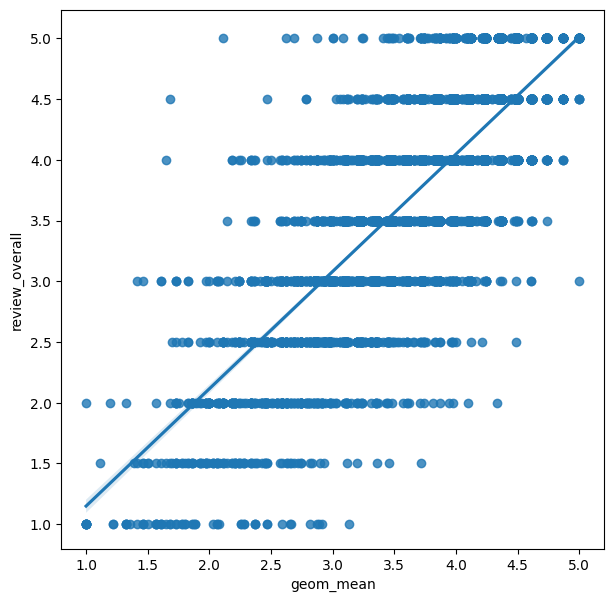

In [162]:
#fazendo uma amostragem pra fazer o plot já que a base é bem grande
data_amostra = data.sample(n=10000, random_state=1)
plt.figure(figsize=(7,7))
sns.regplot(data=data_amostra, x='geom_mean', y='review_overall')
plt.show()

In [163]:
# agora, vendo a correlação em si
data[['review_overall', 'geom_mean']].corr()

,review_overall,geom_mean
review_overall,1.000000,0.778988
geom_mean,0.778988,1.000000


Até que a correlação é forte!

Tentando agora encontrar as melhores cervejarias filtrando o df para mostrar somente as cervejas que receberam tanto overall quanto média geométrica 5/5

In [164]:
melhores_cervejas = data[(data['review_overall'] == 5) & (data['geom_mean'] == 5)]
                                            # dando display por ordem de id
display(melhores_cervejas.sort_values(by='brewery_id'))

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
45672,1,"Plzensky Prazdroj, a. s.",2003-12-07 00:01:31,5.0,5.0,5.0,Hobbz,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
46509,1,"Plzensky Prazdroj, a. s.",2007-04-07 14:29:27,5.0,5.0,5.0,janubio,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
45945,1,"Plzensky Prazdroj, a. s.",2010-06-14 15:26:35,5.0,5.0,5.0,Fengzi,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
45950,1,"Plzensky Prazdroj, a. s.",2010-05-26 07:08:19,5.0,5.0,5.0,appenzeller,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
46382,1,"Plzensky Prazdroj, a. s.",2007-12-28 07:03:07,5.0,5.0,5.0,horseblanket,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378837,27039,The Alchemist,2010-08-03 01:20:07,5.0,5.0,5.0,stonermouse,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378742,27039,The Alchemist,2010-12-23 00:07:01,5.0,5.0,5.0,renaud112,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378698,27039,The Alchemist,2011-02-24 00:03:32,5.0,5.0,5.0,willyvt,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378880,27039,The Alchemist,2011-12-07 20:58:34,5.0,5.0,5.0,nrs207,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0


Fazendo um df e depois um gráfico com as cervejas que mais foram perfeitamente avaliadas (5/5 em geom mean e overall)

In [165]:
contagem_cervejas = melhores_cervejas['beer_name'].value_counts().reset_index()
contagem_cervejas.columns = ['beer_name', 'count']
contagem_cervejas = contagem_cervejas.sort_values(by='count', ascending=False)
display(contagem_cervejas)

,beer_name,count
0,Pliny The Elder,156
1,Trappist Westvleteren 12,134
2,Founders KBS (Kentucky Breakfast Stout),112
3,Pliny The Younger,92
4,Trappistes Rochefort 10,84
...,...,...
1049,Weltenburger Kloster Barock Dunkel,1
1048,Summer Of Lager,1
1047,Ridgetop Red,1
1046,Samuel Adams Blackberry Witbier,1


C:\Users\User\AppData\Local\Temp\ipykernel_6772\303197336.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




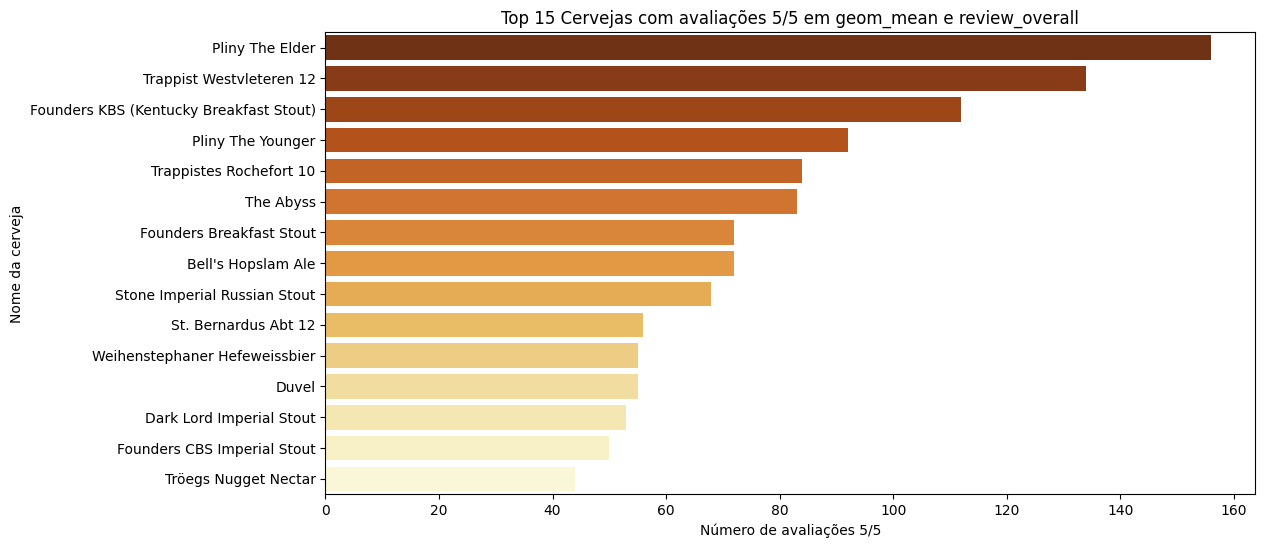

In [166]:
top_cervejas = contagem_cervejas.head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='beer_name', data=top_cervejas, palette='YlOrBr_r')
plt.xlabel('Número de avaliações 5/5')
plt.ylabel('Nome da cerveja')
plt.title('Top 15 Cervejas com avaliações 5/5 em geom_mean e review_overall')
plt.show()

# **Como algumas cervejarias brasileiras se comportam em relação a média geral das cervejarias?**

### *Contexto dos resultados*

As cervejarias brasileiras analisadas nesta seção foram selecionadas por serem responsáveis pela produção de algumas das cervejas mais renomadas dentro os cinco estilos de cerveja mais apreciados pelos brasileiros (segundo a pesquisa exposta na seção anterior).

In [167]:
# Exibe as cervejarias brasileiras que serão analisadas.
brazilian_beer_reviews['brewery_name'].unique()

array(['Cervejaria Colorado', 'Cervejaria Sudbrack Ltda',
       'Cervejarias Reunidas Skol-Caracu',
       'Antarctica (Companhia Brasileira De Bebidas)',
       'Companhia Cervejaria Brahma'], dtype=object)

In [168]:
# Obtem os dados das cervejarias brasileiras em questão.
brazilian_breweries_data = data[
    (data['brewery_name'] == 'Cervejaria Colorado') |
    (data['brewery_name'] == 'Cervejaria Sudbrack Ltda') |
    (data['brewery_name'] == 'Cervejarias Reunidas Skol-Caracu') |
    (data['brewery_name'] == 'Antarctica (Companhia Brasileira De Bebidas)') |
    (data['brewery_name'] == 'Companhia Cervejaria Brahma')
]

# Exibe os dados obtidos.
brazilian_breweries_data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
1494779,2437,Cervejarias Reunidas Skol-Caracu,2005-10-14 18:26:00,5.0,4.5,4.5,nekronos,Milk / Sweet Stout,5.0,5.0,Caracu,5.3,6077,4.74
568575,10096,Cervejaria Sudbrack Ltda,2008-02-10 00:16:49,4.0,4.0,5.0,Calvo,Belgian Strong Pale Ale,5.0,5.0,Eisenbahn Strong Golden Ale,8.5,32870,4.73
274979,2444,Companhia Cervejaria Brahma,2009-07-28 23:15:35,5.0,5.0,4.0,BrahmaMan,American Adjunct Lager,5.0,5.0,Brahma,4.6,23381,4.73
568678,10096,Cervejaria Sudbrack Ltda,2008-02-10 03:00:07,3.0,5.0,5.0,Calvo,Belgian Pale Ale,4.0,4.5,Eisenbahn Pale Ale,4.8,19601,4.61
568877,10096,Cervejaria Sudbrack Ltda,2007-10-26 04:28:49,4.5,4.5,4.0,badbeer,Weizenbock,5.0,5.0,Eisenbahn Vigorosa (Weizenbock),8.0,19608,4.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576014,2479,Antarctica (Companhia Brasileira De Bebidas),2006-09-09 13:18:53,1.0,1.0,2.0,Helfst,American Adjunct Lager,1.0,1.5,Antarctica Chopp Claro,5.0,23492,1.32
1576051,2479,Antarctica (Companhia Brasileira De Bebidas),2006-05-03 03:16:02,1.0,1.0,2.0,schiaveto,Low Alcohol Beer,1.5,1.0,Kronenbier,0.5,6557,1.32
274990,2444,Companhia Cervejaria Brahma,2008-12-09 22:51:11,2.0,1.5,1.0,magictrokini,American Adjunct Lager,1.0,1.5,Brahma,4.6,23381,1.22
1576050,2479,Antarctica (Companhia Brasileira De Bebidas),2007-03-17 04:57:53,1.0,1.0,1.0,brdc,Low Alcohol Beer,1.0,1.0,Kronenbier,0.5,6557,1.00


In [169]:
# Elimina as colunas que serão inúteis nessa análise.
brazilian_breweries_data = brazilian_breweries_data.drop(columns=['brewery_id','review_time','review_profilename','beer_style','beer_beerid','beer_name','beer_abv'])

# Elimina eventuais linhas nulas.
brazilian_breweries_data = brazilian_breweries_data.dropna()

# Exibe o DataFrame resultante da operação acima.
brazilian_breweries_data

,brewery_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,geom_mean
1494779,Cervejarias Reunidas Skol-Caracu,5.0,4.5,4.5,5.0,5.0,4.74
568575,Cervejaria Sudbrack Ltda,4.0,4.0,5.0,5.0,5.0,4.73
274979,Companhia Cervejaria Brahma,5.0,5.0,4.0,5.0,5.0,4.73
568678,Cervejaria Sudbrack Ltda,3.0,5.0,5.0,4.0,4.5,4.61
568877,Cervejaria Sudbrack Ltda,4.5,4.5,4.0,5.0,5.0,4.61
...,...,...,...,...,...,...,...
1576014,Antarctica (Companhia Brasileira De Bebidas),1.0,1.0,2.0,1.0,1.5,1.32
1576051,Antarctica (Companhia Brasileira De Bebidas),1.0,1.0,2.0,1.5,1.0,1.32
274990,Companhia Cervejaria Brahma,2.0,1.5,1.0,1.0,1.5,1.22
1576050,Antarctica (Companhia Brasileira De Bebidas),1.0,1.0,1.0,1.0,1.0,1.00


In [170]:
# Agrupa as cervejarias brasileiras e calcula a média de cada um dos reviews de tais cervejarias.
brazilian_breweries_productions_average_evaluations = brazilian_breweries_data.groupby('brewery_name').mean()

# Exibe o resultado da operação acima.
brazilian_breweries_productions_average_evaluations

,review_overall,review_aroma,review_appearance,review_palate,review_taste,geom_mean
brewery_name,,,,,,
Antarctica (Companhia Brasileira De Bebidas),2.919753,2.580247,3.061728,2.820988,2.777778,2.768519
Cervejaria Colorado,3.681818,3.636364,3.772727,3.727273,3.636364,3.677273
Cervejaria Sudbrack Ltda,3.764706,3.696078,3.680147,3.693627,3.712010,3.675564
Cervejarias Reunidas Skol-Caracu,3.172414,2.543103,2.956897,2.905172,2.741379,2.753103
Companhia Cervejaria Brahma,2.844311,2.356287,2.763473,2.682635,2.550898,2.546168


In [171]:
# Obtem a média dos 'review_overall' das cervejarias brasileiras analisadas e ordena tais valores.
brazilian_breweries_production_average_reviews = brazilian_breweries_productions_average_evaluations['review_overall'].sort_values()

# Obtem a média dos 'review_aroma' das cervejarias brasileiras analisadas e ordena tais valores.
brazilian_breweries_production_aroma_reviews = brazilian_breweries_productions_average_evaluations['review_aroma'].sort_values()

# Obtem a média dos 'review_appearance' das cervejarias brasileiras analisadas ordena tais valores.
brazilian_breweries_production_appearance_reviews = brazilian_breweries_productions_average_evaluations['review_appearance'].sort_values()

# Obtem a média dos 'review_palate' das cervejarias brasileiras analisadas ordena tais valores.
brazilian_breweries_production_palate_reviews = brazilian_breweries_productions_average_evaluations['review_palate'].sort_values()

# Obtem a média dos 'review_taste' das cervejarias brasileiras analisadas e ordena tais valores.
brazilian_breweries_production_taste_reviews = brazilian_breweries_productions_average_evaluations['review_taste'].sort_values()

### *Alguns resultados interessantes*

In [172]:
# Rankeia as cervejarias brasileiras analisadas segundo a avaliação média das cervejas produzidas por elas.
brazilian_breweries_production_average_reviews.sort_values(ascending=False)

brewery_name
Cervejaria Sudbrack Ltda                        3.764706
Cervejaria Colorado                             3.681818
Cervejarias Reunidas Skol-Caracu                3.172414
Antarctica (Companhia Brasileira De Bebidas)    2.919753
Companhia Cervejaria Brahma                     2.844311
Name: review_overall, dtype: float64

In [173]:
# Rankeia as cervejarias brasileiras analisadas segundo a avaliação média do aroma das cervejas produzidas por elas.
brazilian_breweries_production_aroma_reviews.sort_values(ascending=False)

brewery_name
Cervejaria Sudbrack Ltda                        3.696078
Cervejaria Colorado                             3.636364
Antarctica (Companhia Brasileira De Bebidas)    2.580247
Cervejarias Reunidas Skol-Caracu                2.543103
Companhia Cervejaria Brahma                     2.356287
Name: review_aroma, dtype: float64

In [174]:
# Rankeia as cervejarias brasileiras analisadas segundo a avaliação média da aparência das cervejas produzidas por elas.
brazilian_breweries_production_appearance_reviews.sort_values(ascending=False)

brewery_name
Cervejaria Colorado                             3.772727
Cervejaria Sudbrack Ltda                        3.680147
Antarctica (Companhia Brasileira De Bebidas)    3.061728
Cervejarias Reunidas Skol-Caracu                2.956897
Companhia Cervejaria Brahma                     2.763473
Name: review_appearance, dtype: float64

In [175]:
# Rankeia as cervejarias brasileiras analisadas segundo a avaliação média do paladar das cervejas produzidas por elas.
brazilian_breweries_production_palate_reviews.sort_values(ascending=False)

brewery_name
Cervejaria Colorado                             3.727273
Cervejaria Sudbrack Ltda                        3.693627
Cervejarias Reunidas Skol-Caracu                2.905172
Antarctica (Companhia Brasileira De Bebidas)    2.820988
Companhia Cervejaria Brahma                     2.682635
Name: review_palate, dtype: float64

In [176]:
# Rankeia as cervejarias brasileiras analisadas segundo a avaliação média do gosto das cervejas produzidas por elas.
brazilian_breweries_production_taste_reviews.sort_values(ascending=False)

brewery_name
Cervejaria Sudbrack Ltda                        3.712010
Cervejaria Colorado                             3.636364
Antarctica (Companhia Brasileira De Bebidas)    2.777778
Cervejarias Reunidas Skol-Caracu                2.741379
Companhia Cervejaria Brahma                     2.550898
Name: review_taste, dtype: float64

### .

In [177]:
# Elimina as colunas que serão inúteis nessa análise.
breweries_data = data.drop(columns=['brewery_id','review_time','review_profilename','beer_style','beer_beerid','beer_name','beer_abv'])

# Exibe o resultado da operação acima.
breweries_data

,brewery_name,review_overall,review_aroma,review_appearance,review_palate,review_taste,geom_mean
881415,Stone Brewing Co.,4.5,5.0,5.0,5.0,5.0,5.0
1171690,Dogfish Head Brewery,5.0,5.0,5.0,5.0,5.0,5.0
362174,Brasserie Belle-Vue,5.0,5.0,5.0,5.0,5.0,5.0
995488,De Struise Brouwers,5.0,5.0,5.0,5.0,5.0,5.0
698771,Boulder Beer / Wilderness Pub,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...
653726,Red Rock Brewing Company,0.0,2.0,0.0,3.0,1.5,0.0
653706,Red Rock Brewing Company,0.0,3.0,0.0,2.5,3.5,0.0
39667,Desert Edge Brewery,0.0,3.0,0.0,2.0,2.0,0.0
653695,Red Rock Brewing Company,0.0,2.0,0.0,2.5,2.0,0.0


In [178]:
# Obtem a média dos 'review_overall' de cada cervejaria e ordena tais valores.
breweries_production_average_reviews = breweries_data.groupby('brewery_name').mean()['review_overall'].sort_values()

# Obtem a média dos 'review_aroma' de cada cervejaria e ordena tais valores.
breweries_production_aroma_reviews = breweries_data.groupby('brewery_name').mean()['review_aroma'].sort_values()

# Obtem a média dos 'review_appearance' de cada cervejaria e ordena tais valores.
breweries_production_appearance_reviews = breweries_data.groupby('brewery_name').mean()['review_appearance'].sort_values()

# Obtem a média dos 'review_palate' de cada cervejaria e ordena tais valores.
breweries_production_palate_reviews = breweries_data.groupby('brewery_name').mean()['review_palate'].sort_values()

# Obtem a média dos 'review_taste' de cada cervejaria e ordena tais valores.
breweries_production_taste_reviews = breweries_data.groupby('brewery_name').mean()['review_taste'].sort_values()

### *Outros resultandos interessantes*

In [179]:
def generate_boxplot(data: pd.Series, highlited_points: pd.Series, highlighted_points_color: list,
                     title: Optional[str] = "", yaxis_title: Optional[str] = "") -> None:
    '''
        Description:
            Gera um boxplot que destaca pontos específicos e adiciona linhas para destacar os quartis.
        
        Args:
            data (pd.Series): Dados a serem plotados no boxplot.
            highlited_points (pd.Series): Série contendo pontos a serem destacados no boxplot.
            highlighted_points_color (List[str]): Lista de cores para os pontos destacados. Deve ter o mesmo comprimento que highlited_points.
            title (Optional[str]): Título do gráfico. Padrão é uma string vazia.
            yaxis_title (Optional[str]): Título do eixo y. Padrão é uma string vazia.

        Returns:
            None: Esta função não retorna nenhum valor. Ela exibe o gráfico diretamente.
    '''
    
    # Calcula os quartis.
    q1 = np.percentile(data, 25)
    median = np.percentile(data, 50)
    q3 = np.percentile(data, 75)

    # Cria a figure onde serão plotadas as informações.
    fig = go.Figure()

    # Cria o Boxplot.
    fig.add_trace(go.Box(
        # Seta os valores de cada ponto do boxplot.
        y = data,
        # Centra o boxplot no ponto x = 0,5.
        x = [0.5] * len(data),
        # Seta a cor dos outliers.
        marker = dict(color='blue'),
        # Seta a cor da linha do Boxplot.
        line = dict(color='blue'),
        # Seta um título para o Boxplot.
        name = "Boxplot"
    ))

    # Plota os pontos a serem destacados.
    for index, highlited_point in enumerate(highlited_points):
        fig.add_trace(go.Scatter(
            # Seta a posição dos pontos destacados no eixo x como sendo igual à 0,5.
            x= [0.5],
            # Seta o valor do ponto destacado.
            y= [highlited_point],
            # Plota o ponto destacado em questão como um ponto de cor definida em 'highlighted_points_color[index]'.
            mode='markers',
            marker=dict(color=highlighted_points_color[index], size=8),
            # Seta o nome do ponto destacado em questão como sendo o nome presente em 'highlited_points.index[index]'.
            name= highlited_points.index[index]
        ))

    # Cria linhas horizontais para reprentar os quartis.
    quartiles = [q1, median, q3]
    quartiles_name = ['Q1', 'Mediana', 'Q3']
    # Adiciona ao gráfico as linhas horizontais que representam os quartis.
    for i, quartile in enumerate(quartiles):
        fig.add_trace(go.Scatter(
            # Seta o intervalo das linhas horinzontais no eixo x.
            x=[-0.5, 1.5],
            # Adiciona o valor das linhas horizontais no eixo y.
            y=[quartile, quartile],
            # Cria as linhas horizontais como linhas pontilhadas azuis.
            mode='lines',
            line=dict(color='blue', dash='dash'),
            # Adiciona um nome para cada uma das linhas horizontais.
            name=f'{quartiles_name[i]}: {quartile:.2f}'
        ))

    # Seta algumas configurações do plot.
    fig.update_layout(
        # Adiciona um título ao plot.
        title=title,
        # Adiciona um título ao eixo y do plot.
        yaxis_title=yaxis_title,
        # Opta por exibir as legendas.
        showlegend=True,
        # Seta a altura do plot.
        height=800
    )

    # Exibe o plot.
    fig.show()

In [180]:
# Gera um boxplot da distribuição das avaliações médias das cervejas produzidas pelas cervejarias presentes no dataset, destacando as cervejarias
# brasileiras e os quartis do boxplot em questão.

# Cria uma lista de cores para destacar os pontos que representam as cervejarias brasileiras.
colors = ["#2F004F","#780116", "#FF5A5F", "#087E8B","#820B8A"]

# Cria um título para o plot.
title = "Distribuição das avaliações médias das cervejas produzidas pelas cervejarias analisadas"

# Cria um título para o eixo y do plot.
yaxis_title = "Avaliação [Em uma escala de 0 a 5]"

# Cria o plot descrito no ínicio dessa célula.
generate_boxplot(breweries_production_average_reviews, brazilian_breweries_production_average_reviews, 
                 colors,title=title, yaxis_title=yaxis_title)

In [181]:
# Gera um boxplot da distribuição das avaliações médias dos aromas das cervejas produzidas pelas cervejarias presentes no dataset, 
# destacando as cervejarias brasileiras e os quartis do boxplot em questão.

# Cria uma lista de cores para destacar os pontos que representam as cervejarias brasileiras.
colors = ["#2F004F","#780116", "#FF5A5F", "#087E8B","#820B8A"]

# Cria um título para o plot.
title = "Distribuição das avaliações médias dos aromas das cervejas produzidas pelas cervejarias analisadas"

# Cria um título para o eixo y do plot.
yaxis_title = "Avaliação [Em uma escala de 0 a 5]"

# Cria o plot descrito no ínicio dessa célula.
generate_boxplot(breweries_production_aroma_reviews, brazilian_breweries_production_aroma_reviews, 
                 colors,title=title, yaxis_title=yaxis_title)

In [182]:
# Gera um boxplot da distribuição das avaliações médias das aparências das cervejas produzidas pelas cervejarias presentes no dataset, 
# destacando as cervejarias brasileiras e os quartis do boxplot em questão.

# Cria uma lista de cores para destacar os pontos que representam as cervejarias brasileiras.
colors = ["#2F004F","#780116", "#FF5A5F", "#087E8B","#820B8A"]

# Cria um título para o plot.
title = "Distribuição das avaliações médias das aparências das cervejas produzidas pelas cervejarias analisadas"

# Cria um título para o eixo y do plot.
yaxis_title = "Avaliação [Em uma escala de 0 a 5]"

# Cria o plot descrito no ínicio dessa célula.
generate_boxplot(breweries_production_appearance_reviews, brazilian_breweries_production_appearance_reviews, 
                 colors,title=title, yaxis_title=yaxis_title)


In [183]:
# Gera um boxplot da distribuição das avaliações médias dos paladares das cervejas produzidas pelas cervejarias presentes no dataset, 
# destacando as cervejarias brasileiras e os quartis do boxplot em questão.

# Cria uma lista de cores para destacar os pontos que representam as cervejarias brasileiras.
colors = ["#2F004F","#780116", "#FF5A5F", "#087E8B","#820B8A"]

# Cria um título para o plot.
title = "Distribuição das avaliações médias dos paladares das cervejas produzidas pelas cervejarias analisadas"

# Cria um título para o eixo y do plot.
yaxis_title = "Avaliação [Em uma escala de 0 a 5]"

# Cria o plot descrito no ínicio dessa célula.
generate_boxplot(breweries_production_palate_reviews, brazilian_breweries_production_palate_reviews, 
                 colors,title=title, yaxis_title=yaxis_title)

In [184]:
# Gera um boxplot da distribuição das avaliações médias dos sabores das cervejas produzidas pelas cervejarias presentes no dataset, destacando
# as cervejarias brasileiras e os quartis do boxplot em questão.

# Cria uma lista de cores para destacar os pontos que representam as cervejarias brasileiras.
colors = ["#2F004F","#780116", "#FF5A5F", "#087E8B","#820B8A"]

# Cria um título para o plot.
title = "Distribuição das avaliações médias dos sabores das cervejas produzidas pelas cervejarias analisadas"

# Cria um título para o eixo y do plot.
yaxis_title = "Avaliação [Em uma escala de 0 a 5]"

# Cria o plot descrito no ínicio dessa célula.
generate_boxplot(breweries_production_taste_reviews, brazilian_breweries_production_taste_reviews, 
                 colors,title=title, yaxis_title=yaxis_title)

# **Como o teor alcolico das cervejas se correlaciona com as avaliações delas ?**

In [185]:
# Exibe parte do dataset que será analisado.
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
881415,147,Stone Brewing Co.,2010-06-22 19:03:14,4.5,5.0,5.0,itfitz,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.50,1160,5.0
1171690,10099,Dogfish Head Brewery,2003-03-16 12:10:37,5.0,5.0,5.0,Jdiddy,American IPA,5.0,5.0,60 Minute IPA,6.00,6108,5.0
362174,945,Brasserie Belle-Vue,2003-03-20 16:05:20,5.0,5.0,5.0,AtrumAnimus,Lambic - Fruit,5.0,5.0,Belle Vue Framboise,5.20,5356,5.0
995488,15237,De Struise Brouwers,2011-10-27 01:57:00,5.0,5.0,5.0,redleaves,Quadrupel (Quad),5.0,5.0,Pannepot,10.00,34306,5.0
698771,130,Boulder Beer / Wilderness Pub,2009-06-27 14:53:52,5.0,5.0,5.0,jfitzy78,American Brown Ale,5.0,5.0,Flashback Ale,6.88,46809,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653726,1412,Red Rock Brewing Company,2002-08-22 09:15:37,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.00,3822,0.0
653706,1412,Red Rock Brewing Company,2002-08-22 09:22:22,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787,0.0
39667,1413,Desert Edge Brewery,2002-08-25 09:14:49,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.00,3810,0.0
653695,1412,Red Rock Brewing Company,2002-08-22 09:17:39,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.00,3788,0.0


In [186]:
# Verifica o número de cervejas presentes no dataset analisado.
len(data['beer_name'].unique())

56857

In [187]:
# Remove as colunas inúteis para a análise em questão.
filtered_data = data.drop(columns=['brewery_id','brewery_name','review_time','review_profilename','beer_style','beer_beerid'])

# Agrupa os dados filtrados pelos nomes das cervejas presentes no dataset analisado e tira a média de cada um dos tipos de reviews.
beers_average_reviews = filtered_data.groupby('beer_name').mean()

# Dropa uma coluna que não será utilizada.
beers_average_reviews = beers_average_reviews.drop(columns=['geom_mean'])

# Exibe o resultado obtido na operação acima.
beers_average_reviews

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
beer_name,,,,,,
! (Old Ale),4.000000,4.5,4.00,4.000000,4.5,8.2
"""100""",4.000000,4.0,4.00,4.000000,4.4,10.0
"""100"" Pale Ale",4.000000,4.0,3.50,4.000000,4.0,6.6
"""12"" Belgian Golden Strong Ale",4.000000,3.5,4.25,4.750000,4.5,9.0
"""33"" Export",3.000000,3.0,3.00,3.166667,3.0,4.8
...,...,...,...,...,...,...
Žamberecký Kanec Imperial Stout,3.750000,4.5,4.50,4.250000,4.0,5.5
Ω-naught (Omeganaught),4.166667,4.0,4.00,3.500000,3.5,5.0
“Chewy” Double IPA,2.500000,2.0,4.00,3.500000,2.5,6.9


In [188]:
# Renomeia as colunas filtradas do DataFrame.
beers_average_reviews = beers_average_reviews.rename(columns={'review_overall': 'Avaliação média', 'review_aroma': 'Avaliação do aroma',
                                             'review_appearance': 'Avaliação da aparência', 'review_palate': 'Avaliação do paladar',
                                             'review_taste': 'Avaliação do sabor', 'beer_abv': 'Percentual alcólico'})

# Exibe o resultado da operação anterior.
beers_average_reviews

,Avaliação média,Avaliação do aroma,Avaliação da aparência,Avaliação do paladar,Avaliação do sabor,Percentual alcólico
beer_name,,,,,,
! (Old Ale),4.000000,4.5,4.00,4.000000,4.5,8.2
"""100""",4.000000,4.0,4.00,4.000000,4.4,10.0
"""100"" Pale Ale",4.000000,4.0,3.50,4.000000,4.0,6.6
"""12"" Belgian Golden Strong Ale",4.000000,3.5,4.25,4.750000,4.5,9.0
"""33"" Export",3.000000,3.0,3.00,3.166667,3.0,4.8
...,...,...,...,...,...,...
Žamberecký Kanec Imperial Stout,3.750000,4.5,4.50,4.250000,4.0,5.5
Ω-naught (Omeganaught),4.166667,4.0,4.00,3.500000,3.5,5.0
“Chewy” Double IPA,2.500000,2.0,4.00,3.500000,2.5,6.9


In [189]:
# Calcula a matriz de correlação.
correlation_matrix = beers_average_reviews.corr()

# Cria o heatmap.
fig = go.Figure(data=go.Heatmap(
    # Seta os valores de correlação.
    z=correlation_matrix.values,           
    # Seta o rótulo do eixo x.
    x=correlation_matrix.columns,          
    # Seta o rótulo do eixo y.
    y=correlation_matrix.index,    
    # Escolhe a paleta de cores que seŕa usada no heatmap.        
    colorscale=[[0,"#84DCC6"],[1,"#FF6700"]],      
    # Cria uma colorbar para servir de legenda.    
    colorbar=dict(title='Correlação'),
    # Adiciona os valores de correlação nas células do heatmap.
    text=correlation_matrix.values,
    # Formata os valores de correlação para adicioná-los as células do heatmap.
    texttemplate='%{text:.2f}'
))

# Seta um título para o plot.
fig.update_layout(
    title='Matriz de Correlação',
)

# Exibe o plot.
fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6772\48826068.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




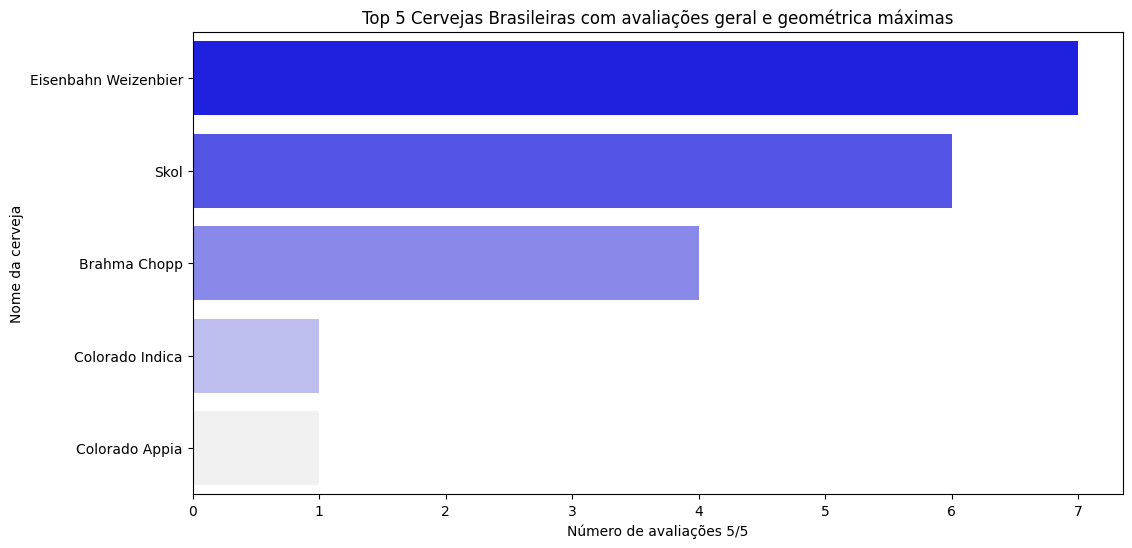

In [190]:
top_cervejas_br = contagem_cervejas_brasileiras.head(5)

# Gráfico das melhores cervejas brasileiras
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='beer_name', data=top_cervejas_br, palette='light:b_r')
plt.xlabel('Número de avaliações 5/5')
plt.ylabel('Nome da cerveja')
plt.title('Top 5 Cervejas Brasileiras com avaliações geral e geométrica máximas')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6772\2528219641.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




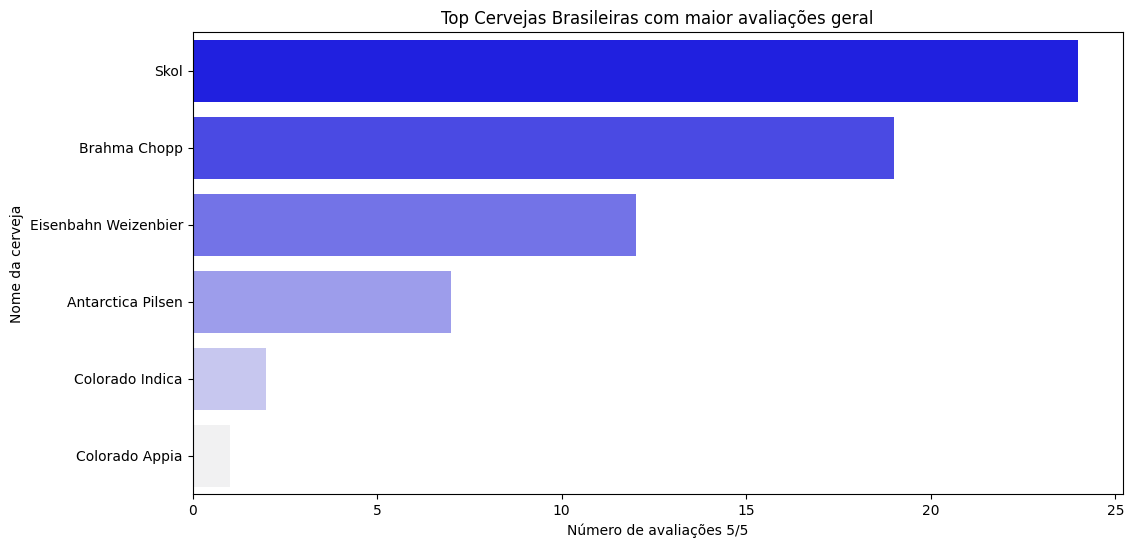

In [191]:
# Selecionando cervejas brasileiras com melhor avaliação overall
best_brbeer_overall = brazilian_beer_reviews[(brazilian_beer_reviews['review_overall'] >= 3)]

contagem_best_brbeer = best_brbeer_overall['beer_name'].value_counts().reset_index()
contagem_best_brbeer.columns = ['beer_name', 'count']
contagem_best_brbeer = contagem_best_brbeer.sort_values(by='count', ascending=False)

overall_top_brbeer = contagem_best_brbeer

# Gráfico das top cervejas com melhor avaliação overall
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='beer_name', data=overall_top_brbeer, palette='light:b_r')
plt.xlabel('Número de avaliações 5/5')
plt.ylabel('Nome da cerveja')
plt.title('Top Cervejas Brasileiras com maior avaliações geral')
plt.show()